yearly_data | head: 
      Year          TSI
0  1850.0  1360.867310
1  1851.0  1360.824097
2  1852.0  1360.819702
3  1853.0  1360.741455
4  1854.0  1360.631836
yearly_data | tail: 
        Year          TSI
445  2295.0  1360.776978
446  2296.0  1360.958008
447  2297.0  1361.153931
448  2298.0  1361.160645
449  2299.0  1361.010254


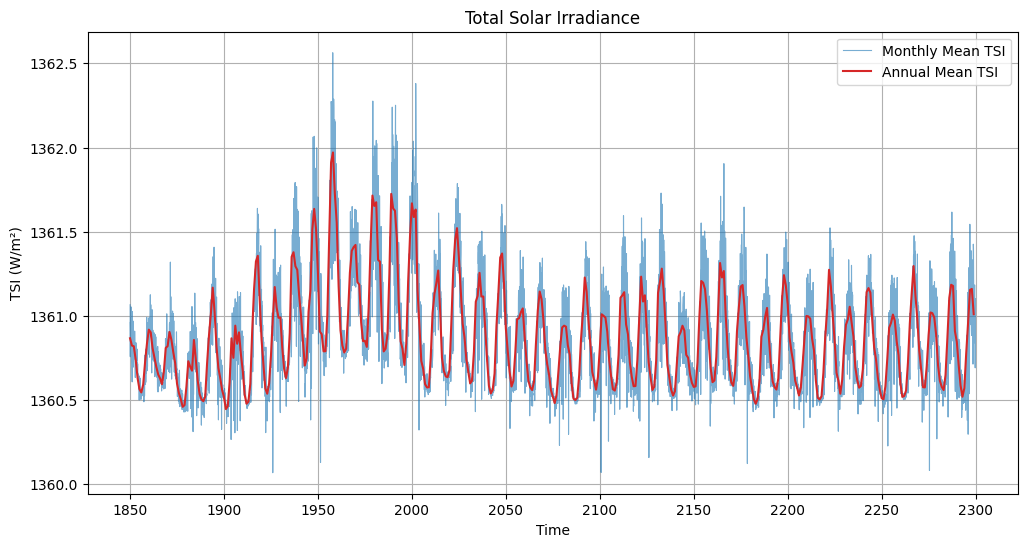

In [3]:
# Convert CMIP6 TSI data from monthly resolution to annual resolution
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import cftime

# Load the NetCDF file
path = 'Attachments/CMIP7_fcg_solar/'
cmip6_solar_filename = 'solarforcing-ref-mon_input4MIPs_solar_CMIP_SOLARIS-HEPPA-3-2_gn_18500101-22991231.nc'
cmip6_solar = nc.Dataset(path + cmip6_solar_filename)

# Extract time and TSI data
time = cmip6_solar.variables['time']
tsi = cmip6_solar.variables['tsi'][:]

# Get time attributes
time_units = time.units  # Example: 'days since 1850-01-01 00:00:00'
time_calendar = getattr(time, 'calendar', 'standard')  # Use 'standard' if missing

# Convert time values to cftime.datetime objects
time_values = nc.num2date(time[:], units=time_units, calendar=time_calendar)

# Create a Pandas DataFrame using cftime datetime objects (without converting to pandas datetime)
df = pd.DataFrame({'Date': time_values, 'TSI': tsi})

# Extract the year manually from cftime datetime
df['Year'] = [t.year for t in df['Date']]

# Compute the annual mean TSI
df_yearly = df.groupby('Year', as_index=False)['TSI'].mean()
df_yearly['Year'] = df_yearly['Year'].astype('float32')
df_yearly['TSI'] = df_yearly['TSI'].astype('float32')
print('yearly_data | head: \n', df_yearly[:5])
print('yearly_data | tail: \n', df_yearly[-5:])

# Save the DataFrame to a text file with the desired formatting:
np.savetxt(path + "df_yearly.txt", df_yearly[['Year', 'TSI']].values, fmt="%.2f %.4f", delimiter=" ")

# Convert time to Matplotlib-compatible format
time_num = mdates.date2num(df['Date'])  # Monthly data
time_num_yearly = mdates.date2num([cftime.datetime(y, 1, 1) for y in df_yearly['Year']])  # Annual data


# Plot the data
plt.figure(figsize=(12, 6))

# Plot Monthly Mean TSI
# plt.plot_date(time_num, df['TSI'], '-', label='Monthly Mean TSI', color='tab:blue', alpha=0.6, linewidth=0.8)
plt.plot(time_num, df['TSI'], '-', label='Monthly Mean TSI', color='tab:blue', alpha=0.6, linewidth=0.8)

# Plot annual Mean TSI
# plt.plot_date(time_num_yearly, df_yearly['TSI'], '-', label='Annual Mean TSI', color='tab:red', linewidth=1.5)
plt.plot(time_num_yearly, df_yearly['TSI'], '-', label='Annual Mean TSI', color='tab:red', linewidth=1.5)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Labels and title
plt.xlabel("Time")
plt.ylabel("TSI (W/m²)")
plt.title("Total Solar Irradiance")
plt.legend()
plt.grid()

# Show plot
plt.show()